# Datathon Team C :)

Dataframe names:
    1. transfer
    2. activ
    3. activfact
    4. client
    5. incidents
    6. firstbooking
    7. promo
    8. bundle
    9. bookactive
    10. bookactive2

In [9]:
#installer 
import pip    
def install(package):
  pip.main(['install', package])

install('seaborn')

  Running setup.py bdist_wheel for seaborn: started
  Running setup.py bdist_wheel for seaborn: finished with status 'done'
  Stored in directory: /home/pato/.cache/pip/wheels/cb/c8/67/83d615c0ef9b529558525aa521025b183de8c5b156799b091e
Successfully built seaborn


Exception:
Traceback (most recent call last):
  File "/usr/local/lib/python3.5/dist-packages/pip/basecommand.py", line 215, in main
    status = self.run(options, args)
  File "/usr/local/lib/python3.5/dist-packages/pip/commands/install.py", line 342, in run
    prefix=options.prefix_path,
  File "/usr/local/lib/python3.5/dist-packages/pip/req/req_set.py", line 784, in install
    **kwargs
  File "/usr/local/lib/python3.5/dist-packages/pip/req/req_install.py", line 851, in install
    self.move_wheel_files(self.source_dir, root=root, prefix=prefix)
  File "/usr/local/lib/python3.5/dist-packages/pip/req/req_install.py", line 1064, in move_wheel_files
    isolated=self.isolated,
  File "/usr/local/lib/python3.5/dist-packages/pip/wheel.py", line 345, in move_wheel_files
    clobber(source, lib_dir, True)
  File "/usr/local/lib/python3.5/dist-packages/pip/wheel.py", line 316, in clobber
    ensure_dir(destdir)
  File "/usr/local/lib/python3.5/dist-packages/pip/utils/__init__.py", line 83, 

In [37]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#functions

def plot_histograms( df , variables , n_rows , n_cols ):
    fig = plt.figure( figsize = ( 16 , 12 ) )
    for i, var_name in enumerate( variables ):
        ax=fig.add_subplot( n_rows , n_cols , i+1 )
        df[ var_name ].hist( bins=10 , ax=ax )
        ax.set_title( 'Skew: ' + str( round( float( df[ var_name ].skew() ) , ) ) ) # + ' ' + var_name ) #var_name+" Distribution")
        ax.set_xticklabels( [] , visible=False )
        ax.set_yticklabels( [] , visible=False )
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( 0 , df[ var ].max() ) )
    facet.add_legend()

def plot_categories( df , cat , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , row = row , col = col )
    facet.map( sns.barplot , cat , target )
    facet.add_legend()

def plot_correlation_map( df ):
    corr = data.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

def describe_more( df ):
    var = [] ; l = [] ; t = []
    for x in df:
        var.append( x )
        l.append( len( pd.value_counts( df[ x ] ) ) )
        t.append( df[ x ].dtypes )
    levels = pd.DataFrame( { 'Variable' : var , 'Levels' : l , 'Datatype' : t } )
    levels.sort_values( by = 'Levels' , inplace = True )
    return levels

def plot_variable_importance( X , y ):
    tree = DecisionTreeClassifier( random_state = 99 )
    tree.fit( X , y )
    plot_model_var_imp( tree , X , y )
    
def plot_model_var_imp( model , X , y ):
    imp = pd.DataFrame( 
        model.feature_importances_  , 
        columns = [ 'Importance' ] , 
        index = X.columns 
    )
    imp = imp.sort_values( [ 'Importance' ] , ascending = True )
    imp[ : 10 ].plot( kind = 'barh' )
    print (model.score( X , y ))
    
def get_median_filtered(signal, threshold=3):
    signal = signal.copy()
    difference = np.abs(signal - np.median(signal))
    median_difference = np.median(difference)
    if median_difference == 0:
        s = 0
    else:
        s = difference / float(median_difference)
    mask = s > threshold
    signal[mask] = np.median(signal)
    return signal

/usr/local/lib/python3.5/dist-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [35]:
%matplotlib inline

## Importing Modules and reading Files

In [3]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

Let me know if you need a package that is not installed so I can install it. Most of what we usually use is already installed.

In [4]:
activfact = pd.read_csv("/data/datathon/Datos/IE_Challenge_2.ActivitiesContentFactsheet v2.txt", sep = "#")
client = pd.read_csv("/data/datathon/Datos/IE_Challenge_3.Clients v2.txt", sep = "#")
incidents = pd.read_csv("/data/datathon/Datos/IE_Challenge_4.IncidentsClaims v2.txt", sep = "#")
firstbooking = pd.read_csv("/data/datathon/Datos/IE_Challenge_5.ClientDate1stBooking v2.txt", sep = "#")
promo = pd.read_csv("/data/datathon/Datos/IE_Challenge_6.Promotions_service code prefix v2.txt", sep = "#")
bundle = pd.read_csv("/data/datathon/Datos/IE_Challenge_7.TicketBundles_service code prefix v2.txt", sep = "#")
bookactive = pd.read_csv("/data/datathon/Datos/Q1_Activities_Bookings.txt", sep = "|")
bookactive2 = pd.read_csv("/data/datathon/Datos/Q2_Transfers_Bookings.txt", sep = "|")

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (1,2,3,6,7,16,29,30,31,32,34,36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


**Please don't read following files entirely, it will crash the server ;)**

In [3]:
tn = 208697688 #number of records in file
tamount = 0.05 #desired sample percentage, a too high number will crash the kernel
tnrows = int(tn * tamount )
transfer_filename = "/data/datathon/Datos/IE_Challenge_0.Transfers_Demand.txt"
print("Reading the first "+ str(tnrows) + " rows which represents " + str(tamount*100) + "% of the file.")
transfer = pd.read_csv(transfer_filename, nrows=tnrows, sep = "|")
print("Done!")

Reading the first 10434884 rows which represents 5.0% of the file.


/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (10,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Done!


In [4]:
an = 154007441 #number of records in file
aamount = 0.1 #desired sample size, a too high number will crash the kernel
anrows = int(an * aamount)
active_filename = "/data/datathon/Datos/IE_Challenge_0.Activities_Demand.txt"
print("Reading the first "+ str(anrows) + " rows which represents " + str(aamount*100) + "% of the file.")
activ = pd.read_csv(active_filename, nrows = anrows, sep = "|")
print("Done!")

Reading the first 15400744 rows which represents 10.0% of the file.


/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Done!


## Explore and enjoy

Remember, we are looking for customer clustoring for any commercial use we can think of. The same as the clustering assignment during Machine Learning I in SPSS. Below are the heads of all the available dataframes.

In [5]:
transfer.head()

,20150526,23,44365,1,HOTELBEDS TOUROPERACION,EVOLUTION,20150609,1200,OK,Unnamed: 9,...,51938,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,2,2.1,1.1,51,INIAVAILCROSSELLING
0,20150708,18.0,136442,1.0,HOTELBEDS TOUROPERACION,EVOLUTION,20150928,1200.0,OK,H,...,NaN,NaN,NaN,NaN,NaN,4.0,0.0,1.0,2,INIAVAILCROSSELLING
1,20140326,11.0,85474,0.0,BEDSONLINE ESPAÑA,APPSERVICES,20140423,1000.0,OK,T,...,NaN,NaN,52-SANSALVADO,52-SANSALVADO,52-SANSALVADO,3.0,0.0,1.0,0,NaN
2,20151206,18.0,15692,1.0,BEDSONLINE ESPAÑA,APPSERVICES,20160326,1000.0,OK,T,...,NaN,NaN,53-CORRALEJO,53AEROPUERTO,53CORRALEJO,2.0,0.0,1.0,4,NaN
3,20151206,19.0,15692,1.0,BEDSONLINE ESPAÑA,APPSERVICES,20160509,1000.0,OK,T,...,NaN,NaN,288-POVOACAO,288HOR,288POVOACAO,2.0,0.0,1.0,0,NaN
4,20150409,21.0,26333,1.0,BEDSONLINE MEXICO,EVOLUTION,20150816,1000.0,OK,T,...,7847,NaN,NaN,153-CUN,153-FICTICIA,4.0,0.0,1.0,3,NaN


In [6]:
activ.head()

,20150913,1,129264,1.1,HOTELBEDS NETOS,APPSERVICES,20160215,20160415,ERR,NQT,Unnamed: 10,2,0,1.2,0.1,Unnamed: 15
0,20150913,1,5944,1.0,HOTELBEDS TOUROPERACION,APPSERVICES,20160216,20160217,OK,LON,NaN,2.0,0.0,11,72,NaN
1,20150913,0,129264,1.0,HOTELBEDS NETOS,APPSERVICES,20160517,20160716,ERR,RCU,NaN,2.0,0.0,1,0,NaN
2,20150617,9,129264,1.0,HOTELBEDS NETOS,APPSERVICES,20150918,20151117,ERR,TWJ,NaN,2.0,0.0,1,0,NaN
3,20151016,1,129264,1.0,HOTELBEDS NETOS,APPSERVICES,20151113,20151215,OK,BUE,NaN,2.0,0.0,1,36,NaN
4,20151016,2,129264,1.0,HOTELBEDS NETOS,APPSERVICES,20151116,20160115,OK,KRK,NaN,2.0,0.0,2,"14,5",NaN


In [7]:
activfact.head()

,Factsheet ID,Segmentation,Segmentation - duration,Concepts
0,10884,Couples|Families|Outdoor activities and advent...,Full day,Admissions - What´s included|Assistance or gui...
1,10886,"Couples|Seniors|Theatre, shows and musicals|Youth",Evening,Admissions - What´s included
2,10887,"Couples|Families|Seniors|Sightseeing, tours an...",Full day|Half-day morning,Admissions - What´s included|Assistance or gui...
3,10888,Adult only|Outdoor activities and adventure,Half-day morning,Assistance or guided tour - What´s included|Tr...
4,10893,"Couples|Families|Seniors|Sightseeing, tours an...",Half-day morning,Admissions - What´s included|Assistance or gui...


In [8]:
client.head()

,Atlas Number,Branch Number,Main Code Atlas,Account Type,Database Target Formula,Commercial Stage,Atlas Status,Customer Type,Customer Subtype,Commercial Management,...,Atlas Code Distribution Type Details,Inactive Reason,Inactive Date,Acquisition Channel Type,Acquisition Channel Description,Customer Acquisition Date,Market Country,Country (Commercial),City (Commercial),Post Code (Commercial)
0,1,NaN,NaN,NaN,1.ACQUIRE,NaN,ACTIVE,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SALOU,43840
1,1,1.0,NaN,BRANCH,4. INACTIVE,LOST,INACTIVE,TRAVEL AGENCY,NaN,NaN,...,NaN,CLIENT STOPS WORKING,04-04-2013,SALES,NaN,05-06-2002,SPAIN,SPAIN,PALMA DE MALLORCA,7006
2,2,NaN,NaN,NaN,1.ACQUIRE,NaN,ACTIVE,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CALELLA,8370
3,2,1.0,31652.0,DUPLICATE BRANCH,4. INACTIVE,NaN,INACTIVE,TRAVEL AGENCY,FRANCHISE/OWN BRANCHES,NaN,...,NaN,CLIENT STOPS WORKING,04-03-2014,SALES,NaN,NaN,SPAIN,SPAIN,PALMA DE MALLORCA,7006
4,3,NaN,NaN,NaN,4. INACTIVE,NaN,INACTIVE,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LLORET DE MAR,17310


In [9]:
incidents.head()

,Office Number,Booking Number,Case Number,Date/Time Opened,Service Id,Life Cycle,Service Type,Subrequest Type Pre,Detail Pre,Subrequest Type On Spot,Detail On spot,Subrequest Type Post,Detail Post
0,1,1,1442241,21-07-2015 10:20:00,1.0,Pre Arrival,Accommodation,NaN,NaN,Information,NaN,NaN,NaN
1,1,1,1530022,30-07-2015 18:22:00,1.0,Pre Arrival,Accommodation,Miscellaneous,Others,NaN,NaN,NaN,NaN
2,1,1,1589333,07-08-2015 10:30:00,1.0,Pre Arrival,Accommodation,Client Requests Hotel Information,Surroundings,NaN,NaN,NaN,NaN
3,1,1,1710068,21-08-2015 21:06:00,1.0,Pre Arrival,Accommodation,Client Requests Booking Confirmation,Booking confirmation,NaN,NaN,NaN,NaN
4,1,1,1710162,21-08-2015 21:22:00,1.0,Pre Arrival,Accommodation,Client Requests Booking Confirmation,Booking confirmation,NaN,NaN,NaN,NaN


In [10]:
firstbooking.head()

,Product,Client,Branch,First booking,Last booking
0,Activities,9,1,02-06-2011 20:52:04,13-01-2016 22:32:35
1,Activities,10,1,03-06-2004 18:15:10,14-09-2010 10:33:45
2,Activities,10,2,18-04-2006 18:02:16,06-09-2010 09:54:22
3,Activities,10,3,26-07-2004 17:43:46,30-12-2008 13:04:25
4,Activities,10,4,28-10-2004 13:13:38,28-10-2004 13:13:38


In [11]:
promo.head()

,ServiceCodePrefix,OfferType,Description
0,OFEB,Early Booking,Discount for big difference between booking an...
1,OFNR,Non Refundable,Discount for renouncing cancellation policy
2,OFFC,Child free,"Adults pay, child/children go free"
3,OFLD,Linear discount,Offer Special: service name


In [12]:
bundle.head()

,Segmentation,Code,Pack,Definition
0,Essential,ESPK,EssentialPack:,"Includes all the sights, monuments and many mo..."
1,Allinoneday,AIPK,All in one day Pack:,Combined visit to all the most important sight...
2,Cultural,CUPK,Cultural Pack:,"Includes museums, historical and artistic sights"
3,Adventure,ADPK,Adventure Pack:,"Visit places for sport, or physical activity, ..."
4,Parks,PAPK,Parks Pack:,Combine several theme and water parks


In [13]:
bookactive.head()

,COMPANY,OFFICE,INCOMING_OFFICE,BOOKING,INTERFACE,INTERFACE_DESC,CLIENT,BRANCH,COUNTRY_MARKET,COUNTRY_MARKET_DESC,...,ADULTS,CHILDREN,INFANTS,CONTRACT,SUPPLIER_CODE,CONTENT_FACTSHEET_CODE,CURRENCY,TTV,TTV_EUR,PCT_COMMISSION
0,U10,4,256,2316073,H,HOTELBEDS TOUROPERACION,26374,1,UK,UNITED KINGDOM,...,2,0,0,2015SILVERCLOUD,6092,11823,USD,707.52,637.81,\N
1,D01,15,79,346660,E,BEDSONLINE ESPAÑA,29833,0,ES,SPAIN,...,3,0,0,PCKCAL13-14,105,\N,EUR,0.00,0.00,12
2,D01,15,79,320410,E,BEDSONLINE ESPAÑA,973,1,ES,SPAIN,...,1,2,0,PQFFVN,365,11111,EUR,0.00,0.00,\N
3,U02,1,164,2173715,E,BEDSONLINE ESPAÑA,60875,1,ES,SPAIN,...,2,0,0,TOWER LON 14,371,11063,EUR,50.80,50.80,12
4,E10,828,148,363244,H,HOTELBEDS TOUROPERACION,8241,1,EC,ECUADOR,...,2,0,0,O-KURBAN13 1415,2204,32407,USD,103.12,89.87,\N


In [14]:
bookactive2.head()

,COMPANY,OFFICE,INCOMING_OFFICE,BOOKING,INTERFACE,INTERFACE_DESC,CLIENT,BRANCH,COUNTRY_MARKET,COUNTRY_MARKET_DESC,...,UNITS,ADULTS,CHILDREN,INFANTS,CONTRACT,SUPPLIER_NAME,CURRENCY,TTV,TTV_EUR,PCT_COMMISSION
0,E10,720,214,462332,P,BEDSONLINE PORTUGAL,27935,1054,PT,PORTUGAL,...,1,1,0,0,MIN KRAMARADA15,180,EUR,21.28,21.28,12
1,E10,720,214,484126,H,HOTELBEDS TOUROPERACION,2016,1,RO,ROMANIA,...,1,1,0,0,EBTKRA MARADA16,180,EUR,17.07,17.07,0
2,E10,703,197,2445325,V,BEDSONLINE MEXICO,55207,1,MX,MEXICO,...,1,2,0,0,MEB CDG-PARIS16,2380,MXN,0,0,14
3,U10,2,254,1221611,E,BEDSONLINE ESPA?A,5520,1,ES,SPAIN,...,1,2,0,0,SEEUSA14SPAB,5905,EUR,0,0,0
4,E10,92,102,4425988,H,HOTELBEDS TOUROPERACION,47931,1,RS,SERBIA,...,1,2,0,0,TO FROM2 SH 14,12754,EUR,17.62,17.62,\N


# Great Job Maurice you are the best!!!


In [5]:
bookactive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526042 entries, 0 to 526041
Data columns (total 37 columns):
COMPANY                     526042 non-null object
OFFICE                      526042 non-null int64
INCOMING_OFFICE             526042 non-null int64
BOOKING                     526042 non-null int64
INTERFACE                   526042 non-null object
INTERFACE_DESC              526042 non-null object
CLIENT                      526042 non-null int64
BRANCH                      526042 non-null int64
COUNTRY_MARKET              526041 non-null object
COUNTRY_MARKET_DESC         526042 non-null object
APPLICATION                 526042 non-null object
SALES_METHOD                28725 non-null object
DESTINATION_COUNTRY         526031 non-null object
DESTINATION_COUNTRY_DESC    526042 non-null object
DESTINATION                 526042 non-null object
DESTINATION_NAME            526042 non-null object
SERVICE_ORDER               526042 non-null int64
ACTIVITY_TYPE               5

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


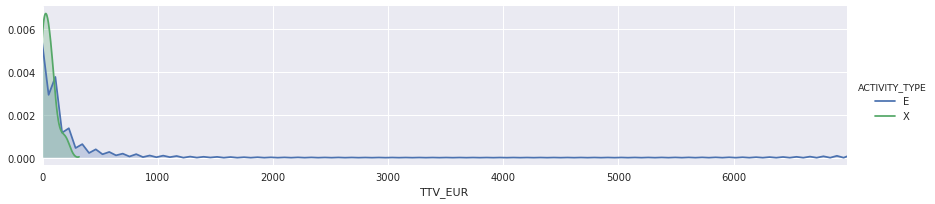

In [42]:
plot_distribution( bookactive , var = 'TTV_EUR' , target = 'ACTIVITY_TYPE' )

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.5/dist-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/usr/local/lib/python3.5/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


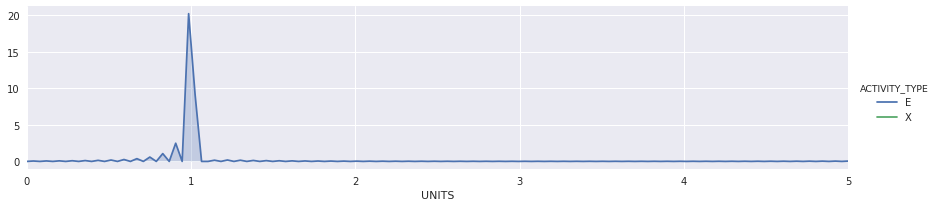

In [45]:
plot_distribution( bookactive , var = 'UNITS' , target = 'ACTIVITY_TYPE' )

## Making a good deal exploration? TTV_EUR

In [32]:
bookactive["TTV_EUR"].describe()

count    526042.000000
mean        181.420273
std         285.240640
min        -384.080000
25%          20.662500
50%          92.000000
75%         206.720000
max        6983.400000
Name: TTV_EUR, dtype: float64

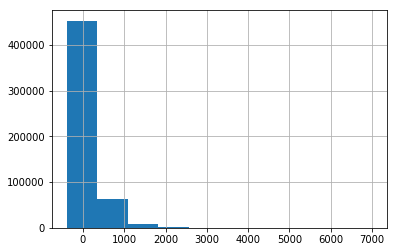

In [36]:
bookactive["TTV_EUR"].hist()

In [31]:
len(bookactive[bookactive.TTV_EUR<0]) #There are 29 negative values, should be input mistakes, lets bin to try to correct this. 


29

In [ ]:
bookactive['TTV_EUR_BIN'] = bookative['TTV_EUR_BIN'].map( lambda s : 'LOSS or FREE' if s <=1 1 else  'SMALL INCOME' if s >= 2 and s <= 5 else 'c6-9km' if s >= 6 and s <= 9 else 'd10-13km' if s >= 10 and s <= 13 else 'e14km +' if s >= 14 else "" )